In [1]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# EDA

In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('catfood_no_outliers.csv')

# Show general information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         164 non-null    object 
 1   price           164 non-null    float64
 2   weight          164 non-null    float64
 3   star_rating     164 non-null    float64
 4   total_comments  164 non-null    float64
 5   adult           164 non-null    float64
 6   chicken         164 non-null    int64  
 7   wet             164 non-null    float64
 8   from_ocean      164 non-null    int64  
 9   fish            164 non-null    int64  
 10  tuna            164 non-null    int64  
 11  salmon          164 non-null    int64  
 12  mackerel        164 non-null    int64  
 13  shrimps         164 non-null    int64  
 14  milk            164 non-null    int64  
 15  can             164 non-null    int64  
 16  gravy           164 non-null    int64  
 17  pouch           164 non-null    int

## Feature selection

In [3]:
print(data.columns.tolist())

['company', 'price', 'weight', 'star_rating', 'total_comments', 'adult', 'chicken', 'wet', 'from_ocean', 'fish', 'tuna', 'salmon', 'mackerel', 'shrimps', 'milk', 'can', 'gravy', 'pouch', 'liver', 'grilled', 'turkey', 'ham', 'vegan']


In [4]:
from sklearn.feature_selection import VarianceThreshold

# Separate numerical and object features
numerical_data = data.select_dtypes(exclude=['object'])
object_data = data.select_dtypes(include=['object'])

# Apply variance threshold
selector = VarianceThreshold(threshold=0.15)
numerical_reduced = selector.fit_transform(numerical_data)

# Recover selected column names
selected_columns = numerical_data.columns[selector.get_support()]
numerical_reduced_df = pd.DataFrame(numerical_reduced, columns=selected_columns, index=data.index)

# Combine with original object columns
data = pd.concat([object_data, numerical_reduced_df], axis=1)

In [5]:
print(data.columns.tolist())

['company', 'price', 'weight', 'star_rating', 'total_comments', 'adult', 'chicken', 'wet', 'from_ocean', 'fish', 'tuna']


<Axes: >

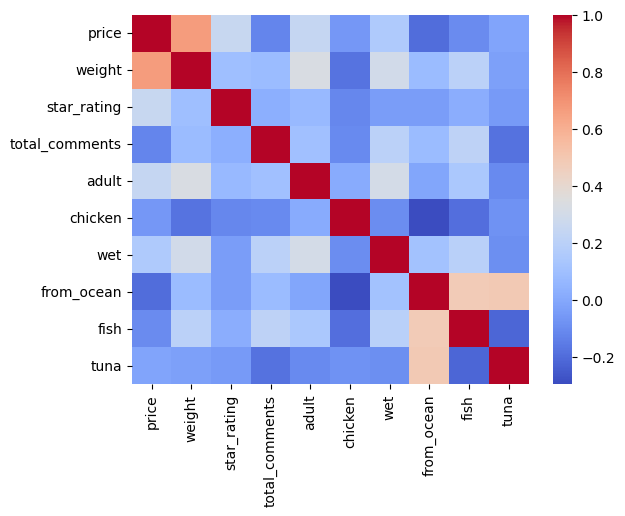

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")


In [7]:
data.drop(['fish','tuna'],axis='columns', inplace=True)
print(data.columns.tolist())

['company', 'price', 'weight', 'star_rating', 'total_comments', 'adult', 'chicken', 'wet', 'from_ocean']


In [8]:
data.to_csv('catfood_prepared.csv', index=False)